In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from dataset import QM7, QM7b, QM7X, QM9, ANI1x



RDKit WARNING: [10:46:31] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
ds_params = {'train_params': {'n': 10000, 
                              'features': ['coulomb'],
                              'embeds': [], 
                              'targets': ['U0'],
                              'pad': 29, 
                              'filter_on': None,
                              'use_pickle': 'qm9.p',
                              'flatten': True}}

qm9 = QM9(**ds_params['train_params'])

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
total uncharacterized molecules removed:  273
total QM9 molecules created:  9727
pickling a copy of the QM9 datadic...
CDataset created...


In [3]:
mol = qm9.ds[100]
print(mol)

./data/qm9/qm9.xyz/dsgdb9nsd_000100


In [15]:
qm9[100]

(array([36.858112 , 15.224954 , 19.002048 , 25.110052 , 25.109932 ,
         8.302856 , 10.00366  , 10.002759 , 12.390027 ,  8.779216 ,
        13.833646 ,  8.303197 , 12.389926 , 13.229769 , 13.229085 ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       , 15.224974 ,
        36.858112 , 19.002048 , 25.110052 , 25.109932 ,  8.302856 ,
        10.00366  , 10.002759 , 12.390027 ,  8.779216 , 13.833646 ,
         8.303197 , 12.389926 , 13.229769 , 13.229085 ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       , 15.224974 , 15.224954 ,
        36.858112 , 25.110052 , 25.109932 ,  8.302856 , 10.00366  ,
        10.002759 , 12.390027 ,  8.779216 , 13.833646 ,  8.303197 ,
        12.389926 , 13.229769 , 13.229085 ,  0. 

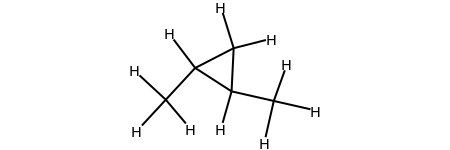

In [4]:
mol.rdmol

In [22]:
print(mol.rdmol.GetNumAtoms())

15


In [23]:
print(mol.smile)

CC1CC1C	C[C@H]1C[C@H]1C	



In [11]:
print(mol.mol_block)


     RDKit          2D

 15 15  0  0  0  0  0  0  0  0999 V2000
    1.8302    1.1491    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8660    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4330    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4330   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0800   -2.1595    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7944    2.2981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.9095    2.1364    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.9793    0.1849    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8534   -0.9207    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9102    1.0105    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1294    2.0654    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9102   -1.0105    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5930   -3.5691    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3295   -2.6726    0

In [6]:
mol.adjacency

array([[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
mol.distance

array([[0.       , 1.5131863, 2.6347182, 2.6625466, 3.170472 , 1.0938021,
        1.0958606, 1.0961703, 2.1845012, 3.518376 , 2.8099246, 3.5231926,
        2.8989146, 3.4661918, 4.19595  ],
       [1.5131863, 0.       , 1.5113351, 1.5137783, 2.6625347, 2.17504  ,
        2.1594367, 2.1698775, 1.0876248, 2.2504857, 2.2265723, 2.1979764,
        2.8586695, 3.1418269, 3.5349524],
       [2.6347182, 1.5113351, 0.       , 1.5113318, 2.6347337, 2.8065476,
        3.1108968, 3.5200408, 2.203751 , 1.084798 , 1.0865461, 2.2037115,
        2.8066344, 3.5200973, 3.1107962],
       [2.6625466, 1.5137783, 1.5113318, 0.       , 1.513185 , 2.8587482,
        3.535005 , 3.1417325, 2.1979527, 2.250499 , 2.2265403, 1.0876244,
        2.1750376, 2.1698892, 2.1594205],
       [3.170472 , 2.6625347, 2.6347337, 1.513185 , 0.       , 2.8990676,
        4.196022 , 3.465977 , 3.523141 , 3.5184162, 2.8099024, 2.184501 ,
        1.0938014, 1.0961721, 1.095859 ],
       [1.0938021, 2.17504  , 2.8065476, 2.8587482

In [12]:
mol.coulomb

array([[36.858112 , 15.224954 , 19.002048 , 25.110052 , 25.109932 ,
         8.302856 , 10.00366  , 10.002759 , 12.390027 ,  8.779216 ,
        13.833646 ,  8.303197 , 12.389926 , 13.229769 , 13.229085 ],
       [15.224974 , 36.858112 , 19.002048 , 25.110052 , 25.109932 ,
         8.302856 , 10.00366  , 10.002759 , 12.390027 ,  8.779216 ,
        13.833646 ,  8.303197 , 12.389926 , 13.229769 , 13.229085 ],
       [15.224974 , 15.224954 , 36.858112 , 25.110052 , 25.109932 ,
         8.302856 , 10.00366  , 10.002759 , 12.390027 ,  8.779216 ,
        13.833646 ,  8.303197 , 12.389926 , 13.229769 , 13.229085 ],
       [15.224974 , 15.224954 , 19.002048 , 36.858112 , 25.109932 ,
         8.302856 , 10.00366  , 10.002759 , 12.390027 ,  8.779216 ,
        13.833646 ,  8.303197 , 12.389926 , 13.229769 , 13.229085 ],
       [15.224974 , 15.224954 , 19.002048 , 25.110052 , 36.858112 ,
         8.302856 , 10.00366  , 10.002759 , 12.390027 ,  8.779216 ,
        13.833646 ,  8.303197 , 12.389926 , 